# Imports

In [1]:
import occCamera
import occGeomtrey
import numpy as np
import ifcopenshell, ifcopenshell.geom
from OCC.Core.Quantity import Quantity_Color, Quantity_TOC_RGB
from OCC.Core.Graphic3d import Graphic3d_BufferType
from PIL import Image
from IPython.display import display

# Test Transforms

<span style='color:orange'>
First, converting to gpTrsf and back:
</span>

In [74]:
R = occGeomtrey.eul2R_zyx(0,0,np.pi/4) 
t = np.array([1,2,3])
T = occGeomtrey.TfromRt(R,t)
gpT = occGeomtrey.T2gpTrsf(T)

print(T)
print(occGeomtrey.gpTrsf2T(gpT)-T)

[[ 0.70710678 -0.70710678  0.          1.        ]
 [ 0.70710678  0.70710678  0.          2.        ]
 [ 0.          0.          1.          3.        ]
 [ 0.          0.          0.          1.        ]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


<span style='color:orange'>
Nice, Now I want to show you that you can multiple gpTrsf
</span>

In [3]:
R1 = occGeomtrey.eul2R_zyx(0,0,np.pi/4) 
t1 = np.array([0,0,0])
T1 = occGeomtrey.TfromRt(R1,t)

R2 = np.eye(3)
t2 = np.array([1,2,3])
T2 = occGeomtrey.TfromRt(R1,t)

T21 = T2 @ T1

gpT1 = occGeomtrey.T2gpTrsf(T1)
gpT2 = occGeomtrey.T2gpTrsf(T2)
gpT21 = gpT2*gpT1

print(T21.round(4))
print(np.round(occGeomtrey.gpTrsf2T(gpT21)-T21,4))

[[ 0. -1.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  1.  2.]
 [ 0.  0.  0.  1.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


<span style='color:orange'>
We can also invert transforms
</span>

In [9]:
R = occGeomtrey.eul2R_zyx(0,0,np.pi/4) 
t = np.array([0,0,1])
T = occGeomtrey.TfromRt(R,t)

invT = occGeomtrey.InverseTransform(T)
print(np.round(invT*T,4))

gpT = occGeomtrey.T2gpTrsf(T)
gpT.Invert()

print(np.round(occGeomtrey.gpTrsf2T(gpT)-invT,4))

[[ 1. -0.  0.  0.]
 [-0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
[[ 0.  0.  0. -0.]
 [ 0.  0.  0. -0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


<span style='color:orange'>
gpTrsf is an object from occ... lets see what we can do with it:
</span>

In [18]:
R = occGeomtrey.eul2R_zyx(0,0,np.pi/4) 
t = np.array([1,2,3])
T = occGeomtrey.TfromRt(R,t)
gpT = occGeomtrey.T2gpTrsf(T)

print('VectorialPart()')
print(occGeomtrey.gpMattoNumpy(gpT.VectorialPart()))

print('TranslationPart().Coord()')
print(gpT.TranslationPart().Coord())

print('Transforms()')
print(gpT.Transforms())

print('GetRotation().GetMatrix()')
print(occGeomtrey.gpMat3toNumpy(gpT.GetRotation().GetMatrix()))

print('Value(1,1)')
print(gpT.Value(1,1))

VectorialPart()
[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]]
TranslationPart().Coord()
(1.0, 2.0, 3.0)
Transforms()
(1.0, 2.0, 3.0)
GetRotation().GetMatrix()
[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]
Value(1,1)
0.7071067811865476


# Test Camera Transforms

 ###### 3D rendering pipe initialisation #####
Display3d class initialization starting ...
Aspect_DisplayConnection created.
Graphic_Driver created.
V3d_Viewer created.
AIS_InteractiveContext created.
V3d_View created
Display3d class successfully initialized.
 ########################################
Transform:
[[ 1.  0. -0.  0.]
 [ 0. -1. -0. -0.]
 [-0.  0. -1.  6.]
 [ 0.  0.  0.  1.]]
Eye:(2.4355994322017748e-15, -1.9984014443252818e-15, 6.0)
Direction:(-7.81734838230998e-17, -5.551115123125783e-17, -1.0)


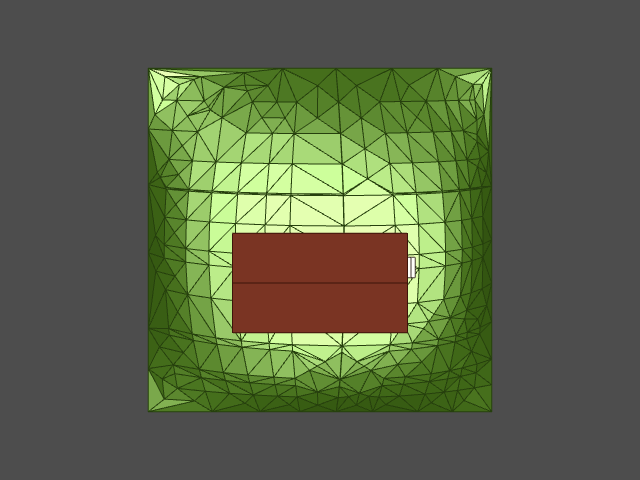

In [30]:
offscreen_renderer = occCamera.offlineRenderIFC()
cam = offscreen_renderer.View.Camera()

pose = np.array([0,0,6,np.pi,0,0])
occCamera.moveCam2Pose(cam,pose)
print(f'Transform:\n{occCamera.getCameraTransform(cam).round(4)}')
print(f'Eye:{cam.Eye().Coord()}')
print(f'Direction:{cam.Direction().Coord()}')

data = offscreen_renderer.GetImageData(640, 480, Graphic3d_BufferType.Graphic3d_BT_RGB) #There is also: Graphic3d_BT_Depth!
img = Image.frombytes('RGB', (640, 480), data)
display(img)

# Test Camera Intrinsics

In [6]:
#occ has world coordiante system, projection coordiante system, and view coordinate system
offscreen_renderer = occCamera.offlineRenderIFC()
cam = offscreen_renderer.View.Camera()
occCamera.getProjectionMatrix(cam)

 ###### 3D rendering pipe initialisation #####
Display3d class initialization starting ...
Aspect_DisplayConnection created.
Graphic_Driver created.
V3d_Viewer created.
AIS_InteractiveContext created.
V3d_View created
Display3d class successfully initialized.
 ########################################


array([[ 0.05363987,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.07151983,  0.        ,  0.        ],
       [ 0.        ,  0.        , -0.06425702,  0.        ],
       [-0.        , -0.        , -1.99999684,  1.        ]])

In [69]:
# Get stereographic focus value. returns absolute or relative stereographic focus value depending on its definition type.
print(f'ZFocus = {cam.ZFocus()}')
# Get stereographic focus definition type. returns definition type used for stereographic focus.
print(f'ZFocusType = {cam.ZFocusType()}')
#Get the near z-clipping plane position. returns the distance of the plane from the eye.
print(f'ZNear = {cam.ZNear()}')
#Get the far z-clipping plane position. returns the distance of the plane from the eye.
print(f'ZFar = {cam.ZFar()}')
#Calculate view plane size at center (target) point and distance between zfar and znear planes. returns values in form of gp_pnt (width, height, depth).
print(f'ViewDimensions().Coord() = {cam.ViewDimensions().Coord()}')
# Get center of the camera, e.g. the point where camera looks at. this point is computed as eye() translated along direction() at distance(). returns the point where the camera looks at.
print(f'Center().Coord() = {cam.Center().Coord()}')
# camera scale factor.
print(f'Scale() = {cam.Scale()}')
# Get camera display ratio. returns display ratio.
print(f'Aspect() = {cam.Aspect()}')
# Get intraocular distance value. returns absolute or relative iod value depending on its definition type.
print(f'IOD() = {cam.IOD()}')
# Get camera axial scale. returns camera’s axial scale.
print(f'AxialScale().Coord() = {cam.AxialScale().Coord()}')

ZFocus = 1.0
ZFocusType = 1
ZNear = 15.56245289540218
ZFar = 46.687456914661134
ViewDimensions().Coord() = (37.285698280635934, 27.964273710476952, 31.125004019258952)
Center().Coord() = (2.4533852666370097e-18, -3.7261834437152354e-15, -25.124953474520186)
Scale() = 27.964273710476952
Aspect() = 1.3333333333333333
IOD() = 0.05
AxialScale().Coord() = (1.0, 1.0, 1.0)


In [27]:
# I am not sure what this is....
print(cam.FrustumVert_LeftBottomNear)
print(cam.FrustumVert_LeftBottomFar)
print(cam.FrustumVert_LeftTopNear)
print(cam.FrustumVert_LeftTopFar)
print(cam.FrustumVert_RightBottomNear)
print(cam.FrustumVert_RightBottomFar)
print(cam.FrustumVert_RightTopNear)
print(cam.FrustumVert_RightTopFar)

0
1
2
3
4
5
6
7


# Depth Camera

In [ ]:
sz = (1024,768)
offscreen_renderer = occRobotics.offlineRenderIFC()
offscreen_renderer.Create()
offscreen_renderer.SetSize(sz[0], sz[1])
offscreen_renderer.SetModeShaded()
data = offscreen_renderer.GetImageData(sz[0],sz[1],Graphic3d_BufferType.Graphic3d_BT_Depth)
print(data)

#img = Image.frombytes('RGB',sz, data)
#display(img)

#picture is all black!
# can be resolved? https://github.com/tpaviot/pythonocc-core/issues/854

 ###### 3D rendering pipe initialisation #####
Display3d class initialization starting ...
Aspect_DisplayConnection created.
Graphic_Driver created.
V3d_Viewer created.
AIS_InteractiveContext created.
V3d_View created
Display3d class successfully initialized.
 ########################################
Display3d class successfully initialized.
 ########################################
None
